In [61]:
import csv
import datetime
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

fn = 'trip_data_11.csv'
f = open(fn,'r')
reader = csv.reader(f)
n=0
minDate = None
maxDate = None
maxLat = 39
maxLong = -77
minLat = 44
minLong = -71
minPass = 1
maxPass = 0
minSeconds = 1000
maxSeconds = 0
maxLongCoords = 0
maxLatCoords = 0
minLongCoords = 0
minLatCoords = 0
minMiles = 10
maxMiles = 0
maxRateCode = 0
numLocalCoords = 0
rateDict = {}
passDict = {}
havDist = []
for row in reader:

    if n > 0:
        dts = row[6]
        long1 = -77
        lat1 = 39
        long2 = -77
        lat2 = 39
        passengers = 1
        seconds = row[8]
        rateCode = 1
        dto = None

        #date
        try:
            dto = datetime.datetime.strptime(dts,'%Y-%m-%d %H:%M:%S')
            if dto < minDate:
                minDate = dto
            elif dto > maxDate:
                maxDate = dto
        except Exception as e:
            print(e)

        #coordinates
        try:
            long1 = float(row[10])
            lat1 = float(row[11])
            long2 = float(row[12])
            lat2 = float(row[13])
            #about a 100 mile radius
            if lat2 > 39 and lat2 < 44 and long2 > -77 and long2 < -71:
                if lat2 > maxLat:
                    maxLat = lat2
                    maxLatCoords = [lat2,long2]
                if long2 > maxLong:
                    maxLong = long2
                    maxLongCoords = [lat2,long2]
                if lat2 < minLat:
                    minLat = lat2
                    minLatCoords = [lat2,long2]
                if long2 < minLong:
                    minLong = long2
                    minLongCoords = [lat2,long2]

                havDist.append(haversine(long1,lat1,long2,lat2))
                numLocalCoords += 1

        except Exception as e:
            print(e)

        #passengers
        try:
            passengers = int(row[7])
            if passengers > 0:
                minPass = min(minPass, passengers)
            maxPass = max(maxPass, passengers)
            if dto.hour in passDict:
                passDict[dto.hour].append(passengers)
            else:
                passDict[dto.hour] = [passengers]
        except Exception as e:
            print(e)

        #trip seconds
        try:
            seconds = int(seconds)
            rateCode = int(row[3])
            rateDict[rateCode] = 1
            if seconds > 0:
                minSeconds = min(minSeconds,seconds)
                maxSeconds = max(maxSeconds, seconds)
            maxRateCode = max(maxRateCode,rateCode)
        except Exception as e:
            print(e)

        try:
            miles = float(row[9])
            if miles > 0:
                minMiles = min(minMiles,miles)
                maxMiles = max(maxMiles, miles)
        except Exception as e:
            print(e)

        if n == 1:
            print(row)
            minDate = dto
            maxDate = dto
            maxLat = max(lat1, lat2)
            maxLong = max(long1,long2)
            minLat = min(lat1,lat2)
            minLong = min(long1,long2)
            minPass = int(row[7])
            maxPass = int(row[7])

    else:
        print(row)


    n+=1
print(n)

f.close()

['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']
'<' not supported between instances of 'datetime.datetime' and 'NoneType'
['E9A54865CAF737ED003957478C9D8FA1', '912A2B86F30CDFE246586972A892367E', 'CMT', '1', 'N', '2013-11-25 15:53:33', '2013-11-25 16:00:51', '1', '437', '.60', '-73.978104', '40.752968', '-73.985756', '40.762684']
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to floa

In [62]:
percentLocalTrips = numLocalCoords/n
percentLocalTrips

0.9802549989394272

In [42]:
print('coords: [lat, long]')
print('min lat:',minLatCoords)
print('min long: ',minLongCoords)
print('max lat: ',maxLatCoords)
print('max long: ',maxLongCoords)
print('min date: ',minDate)
print('max date: ',maxDate)
print('min passengers: ',minPass)
print('max passengers: ',maxPass)
print('min seconds: ', minSeconds)
print('max seconds: ', maxSeconds)
print('min miles: ', minMiles)
print('max miles: ', maxMiles)
print('max rate code: ', maxRateCode)

coords: [lat, long]
min lat: [39.195042, -76.8097]
min long:  [39.195042, -76.8097]
max lat:  [43.933346, -75.395187]
max long:  [42.347462, -71.084297]
min date:  2013-11-01 00:00:07
max date:  2013-12-01 01:47:54
min passengers:  1
max passengers:  208
min seconds:  1
max seconds:  10800
min miles:  0.01
max miles:  100.0
max rate code:  210


In [59]:
a = list(rateDict.keys())
a.sort()


In [60]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 210]

In [35]:
import matplotlib.pyplot as plt
from tqdm import tqdm
havDist.sort()
print(sum(havDist)/len(havDist))
dict = {}
for d in tqdm(havDist):
    d = int(round(d))

    if d < 1:  
        if '<1' in dict:
            dict['<1'] = dict['<1'] + 1
        else:
            dict['<1'] = 1
    elif d < 3:  
        if '1-3' in dict:
            dict['1-3'] = dict['1-3'] + 1
        else:
            dict['1-3'] = 1
    elif d < 5:  
        if '3-5' in dict:
            dict['3-5'] = dict['3-5'] + 1
        else:
            dict['3-5'] = 1
    elif d > 5:  
        if '>5' in dict:
            dict['>5'] = dict['>5'] + 1
        else:
            dict['>5'] = 1



16.643691955638253


100%|██████████| 14387697/14387697 [00:06<00:00, 2206254.57it/s]


<BarContainer object of 4 artists>

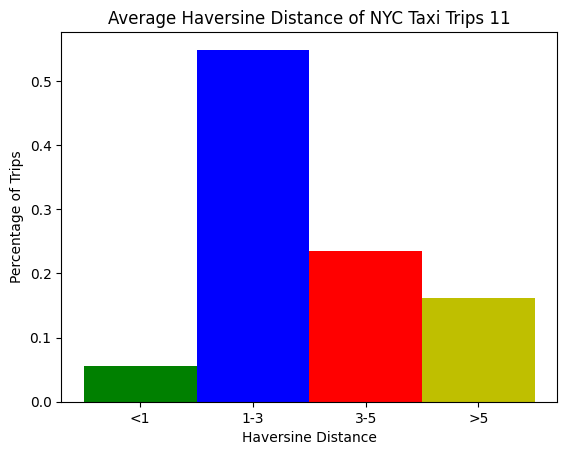

In [36]:
totalsum = 0
for d in dict:
    totalsum += dict[d]
for d in dict:
    dict[d] = dict[d] / totalsum

#myKeys = list(dict.keys())
#myKeys.sort()
#dict = {i: dict[i] for i in myKeys}
plt.title('Average Haversine Distance of NYC Taxi Trips 11')
plt.xlabel('Haversine Distance')
plt.ylabel('Percentage of Trips')
plt.bar(dict.keys(), dict.values(), width=1, color=['g','b','r','y'])

In [37]:
for r in passDict:
    passDict[r] = sum(passDict[r])/len(passDict[r])
passDict

{16: 1.7290752721839722,
 15: 1.7199300400989677,
 10: 1.6511359930092737,
 7: 1.578063437050065,
 21: 1.7377169245109836,
 5: 1.6162542455118873,
 8: 1.6250137364727444,
 14: 1.6972602092042064,
 11: 1.675831162503752,
 12: 1.6866603768271045,
 9: 1.625381152224911,
 13: 1.6905301769169834,
 6: 1.5565408940716938,
 23: 1.7612390927781645,
 17: 1.7221493087965178,
 18: 1.721289955089229,
 20: 1.729533208487954,
 22: 1.749702687026919,
 19: 1.72786536235998,
 2: 1.7543485016521598,
 1: 1.753863549141869,
 0: 1.762467618175192,
 4: 1.7355799092526503,
 3: 1.7530907053987739}

<BarContainer object of 24 artists>

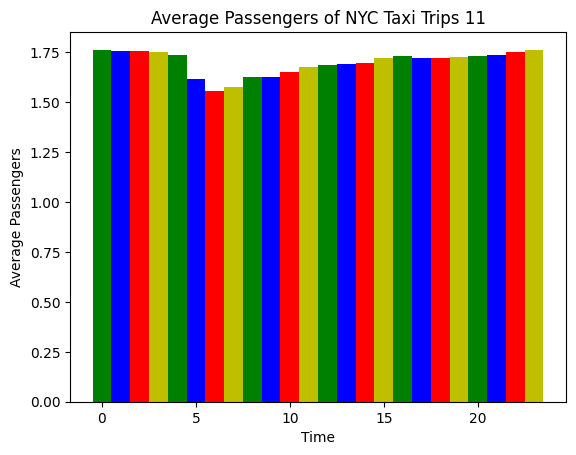

In [38]:
myKeys = list(passDict.keys())
myKeys.sort()
passDict = {i: passDict[i] for i in myKeys}
plt.title('Average Passengers of NYC Taxi Trips 11')
plt.xlabel('Time')
plt.ylabel('Average Passengers')
plt.bar(passDict.keys(), passDict.values(), width=1, color=['g','b','r','y'])

In [39]:
fn = 'trip_data_11.csv'
f = open(fn,'r')

reader = csv.reader(f)


with open('trip_data_subset_11.csv','w') as f2:
    f2.write('')

with open('trip_data_subset_11.csv','a') as f2:
    writer = csv.writer(f2,delimiter=',',lineterminator='\n')
    for i,row in enumerate(reader):
        if i % 1000 == 0:
            writer.writerow(row)

f.close()

In [45]:
fn = 'trip_data_subset_11.csv'
f = open(fn,'r')
reader = csv.reader(f)
passDict2 = {}
for n, row in enumerate(reader):

    if n > 0:
        dts = row[6]

        try:
            dto = datetime.datetime.strptime(dts,'%Y-%m-%d %H:%M:%S')
        except Exception as e:
            print(e)
        #passengers
        try:
            passengers = int(row[7])
            if dto.hour in passDict2:
                passDict2[dto.hour].append(passengers)
            else:
                passDict2[dto.hour] = [passengers]
        except Exception as e:
            pass

        if n == 0:
            minPass = int(row[7])
            maxPass = int(row[7])

<BarContainer object of 24 artists>

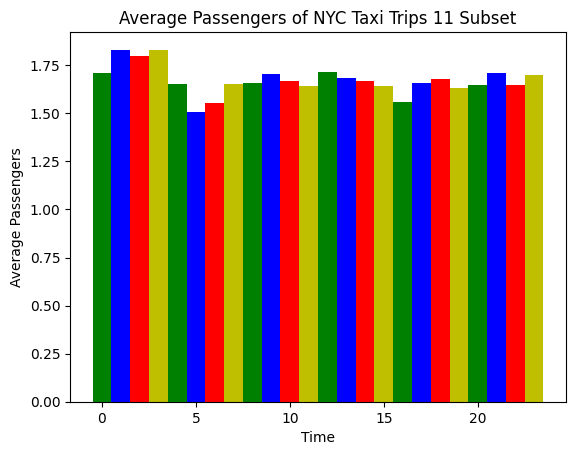

In [46]:
for r in passDict2:
    passDict2[r] = sum(passDict2[r])/len(passDict2[r])

myKeys = list(passDict2.keys())
myKeys.sort()
passDict2 = {i: passDict2[i] for i in myKeys}
plt.title('Average Passengers of NYC Taxi Trips 11 Subset')
plt.xlabel('Time')
plt.ylabel('Average Passengers')
plt.bar(passDict2.keys(), passDict2.values(), width=1, color=['g','b','r','y'])

names: ['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']

first row: ['03433D4310F10E0DFA32737C788035B1', 'D244B4FDD5DEE7DB7A1B96C577F64168', 'VTS', '1', '', '2013-11-06 21:20:00', '2013-11-06 21:50:00', '2', '1800', '10.74', '-73.874573', '40.774063', '-73.980797', '40.763554']